In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as func
from datetime import datetime
import time
import dp as dp
plt.rcdefaults()

In [3]:
path = "dp_simulation/"
prefix = datetime.today().strftime('%y_%m_%d_')

In [3]:
cust_behaviour_loaded = pd.read_csv("model_eval/cust_behaviour.csv")
cust_behaviour = cust_behaviour_loaded.drop(["Unnamed: 0"], axis=1)
cust_count = 1000
first_cust_nr = 100000
margin = 0.5
fix_order_costs = 9.0
cost_per_prom = 1.0
budget = 500
history = ["cust_nrs", "t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "t1_size", "t2_size", "t3_size"]

customers = func.create_cust_with_initial_behaviour(cust_count, first_cust_nr)
logfilepath = path + prefix + "dp_policy_simulation_log.csv"
evalfilepath = path + prefix + "dp_policy_simulation.csv"

In [4]:
eval_runs_exists = False
for period in range(0,3):
    customers = customers[history]
    customers = dp.decide_with_dp(cust_behaviour, customers, budget, logfilepath)
    customers = func.generate_orders(customers, margin, fix_order_costs, cost_per_prom)
    customers["period"] = period
    customers["profit"] = customers["size"] * margin - (customers["has_bought"] * fix_order_costs) - (customers["has_prom"] * cost_per_prom)

    eval_run = func.get_kpis(customers, "dp_policy")

    if eval_runs_exists:
        eval_runs = pd.concat([eval_runs, eval_run])
    else:
        eval_runs = eval_run
        eval_runs_exists = True
        
eval_runs.to_csv(evalfilepath, sep=';', decimal=',')
eval_runs.head()
    

Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Anzahl Kunden mit Werbung 1000.0 bei Kosten von 0.1 in Iteration 1
Anzahl Kunden mit Werbung 0.0 bei Kosten von 50.05 in Iteration 2
Anzahl Kunden mit Werbung 218.0 bei Kosten von 25.075 in Iteration 3
Anzahl Kunden mit Werbung 1000.0 bei Kosten von 12.5875 in Iteration 4
Anzahl Kunden mit Werbung 917.0 bei Kosten von 18.83125 in Iteration 5
Anzahl Kunden mit Werbung 855.0 bei Kosten von 21.953125 in Iteration 6
Anzahl Kunden mit Werbung 271.0 bei Kosten von 23.5140625 in Iteration 7
Anzahl Kunden mit Werbung 804.0 bei Kosten von 22.73359375 in Iteration 8
Anzahl Kunden mit Werbung 271.0 bei Kosten von 23.123828125000003 in Iteration 9
Anzahl Kunden mit Werbung 796.0 bei Kosten von 22.9287109375 in Iteration 10
Anzahl Kunden mit Werbung 796.0 bei Kosten von 23.02626953125 in Iteration 11
Anzahl Kunden mit Werbung 796.0 bei Kosten von 23.075048828125002 in Iteration 12
Anzahl Kunden mit Werbung 284.0 bei Kosten von 23.099438476

,models,proms_sent,buys,orders_sum,profit,exp_profit
0,dp_policy,500,420,33984.4,12712.2,12205.1
0,dp_policy,500,428,35476.9,13386.4,13076.5
0,dp_policy,500,405,32987.9,12348.9,12024.2


In [ ]:
cust_behaviour_loaded = pd.read_csv("model_eval/cust_behaviour.csv")
cust_behaviour = cust_behaviour_loaded.drop(["Unnamed: 0"], axis=1)
cust_behaviour_2 = cust_behaviour.copy()
cust_behaviour = cust_behaviour.rename(columns={"t1_buy": "a1", "t2_buy": "a2", "t3_buy": "a3", "t1_prom": "w1", "t2_prom": "w2", "t3_prom": "w3", "p_no_prom": "p_0", "size_no_prom": "r_0", "p_prom": "p_1", "size_prom": "r_1"})
cust_behaviour.head()

start_value = 1000.0001
I = 500
fix_order_costs = 9.0
margin = 0.5
gamma = 0.995 # 0.995   # Diskontfaktor   
c = 1.0
value_table = dp.init_value_table(I, cust_behaviour, start_value)

cust_count = 1000
first_cust_nr = 100000
cost_per_prom = 1.0
customers = func.create_cust_with_initial_behaviour(cust_count, first_cust_nr)
history = ["cust_nrs", "t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom", "t1_size", "t2_size", "t3_size"]
orders_pre = customers
orders_pre = orders_pre[history]
for period in range(0, 12):
    orders_pre = func.simulate_period(orders_pre, cust_behaviour_2, fix_order_costs, margin, cost_per_prom, int(cust_count/2) , int(cust_count/2), period, "random")
cust = orders_pre[history]

C:\Users\olive\AppData\Local\Temp\ipykernel_4976\2724361131.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  value_table["Q_1_"+str(i)] = start_value
C:\Users\olive\AppData\Local\Temp\ipykernel_4976\2724361131.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  value_table["w_"+str(i)] = 0
C:\Users\olive\AppData\Local\Temp\ipykernel_4976\2724361131.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all col

In [18]:
start_time = time.time_ns()
last_time = start_time
fullfilepath = "dp_perf_log_find_good_c_faster.csv"
iteration = 0
last_time = func.write_dp_performance_log(fullfilepath, start_time, last_time, 0, 0, 0, print_out = True, write_header = True)

min_c = 0.1
max_c = 100.0
budget = 500
c = min_c
while True:
    print("Min C "+str(min_c)+" Max C "+str(max_c)+" Kosten "+str(c))
    iteration = iteration + 1
    customers = cust.copy()
    cust_behaviour = dp.v(I, gamma, start_value, c, fix_order_costs, margin, cust_behaviour, value_table)
    customers = customers.merge(cust_behaviour, how='left', left_on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], right_on=["a1", "a2", "a3", "w1", "w2", "w3"], suffixes=('_x', ''))
    cust_count = customers["w"].sum()
    last_time = func.write_dp_performance_log(fullfilepath, start_time, last_time, c, cust_count, iteration, print_out = True, write_header = False)
    if cust_count > budget:
        min_c = c
        c = max_c - ((max_c - min_c) / 2.0)
    elif cust_count < budget:
        max_c = c
        c = max_c - ((max_c - min_c) / 2.0)
    if (max_c - min_c) < 0.01:
        break

Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Min C 0.1 Max C 100.0 Kosten 0.1
Last Iteration: 1 2.388832497795974
Anzahl Kunden mit Werbung 1000 bei Kosten von 0.1 in Iteration 1
Min C 0.1 Max C 100.0 Kosten 50.05
Last Iteration: 1 0.32388683478970215
Anzahl Kunden mit Werbung 0 bei Kosten von 50.05 in Iteration 2
Min C 0.1 Max C 50.05 Kosten 25.075
Last Iteration: 1 0.3238868347897199
Anzahl Kunden mit Werbung 224 bei Kosten von 25.075 in Iteration 3
Min C 0.1 Max C 25.075 Kosten 12.5875
Last Iteration: 1 1.3612249784255468
Anzahl Kunden mit Werbung 1000 bei Kosten von 12.5875 in Iteration 4
Min C 12.5875 Max C 25.075 Kosten 18.83125
Last Iteration: 1 0.8460615844287993
Anzahl Kunden mit Werbung 933 bei Kosten von 18.83125 in Iteration 5
Min C 18.83125 Max C 25.075 Kosten 21.953125
Last Iteration: 1 0.5866900025281261
Anzahl Kunden mit Werbung 865 bei Kosten von 21.953125 in Iteration 6
Min C 21.953125 Max C 25.075 Kosten 23.5140625
Last Iteration: 1 0.45558430775979986

In [4]:
fullfilepath = "dp_perf_log_find_good_c_faster.csv"
df_perf = pd.read_csv(fullfilepath, sep=';', decimal=',')
df_perf["iteration_ms"] = df_perf["diff_ms"].astype(int)
df_perf["iteration_s"] = df_perf["iteration_ms"] / 1000
df_perf["cust_count"] = df_perf["cust_count"].astype(int)
df_perf["Iteration"] = df_perf["iteration"].astype(int)
df_perf["c"] = df_perf["c"].astype(float)
df_perf.head()

,time_ms,diff_ms,c,cust_count,iteration,min_c,max_c,iteration_ms,iteration_s,Iteration
0,190261,190260,0.10000,1000,1,0,0,190260,190.260,1
1,381418,191157,50.05000,0,2,0,0,191157,191.157,2
2,574097,192679,25.07500,224,3,0,0,192679,192.679,3
3,788608,214510,12.58750,1000,4,0,0,214510,214.510,4
4,984254,195646,18.83125,933,5,0,0,195646,195.646,5


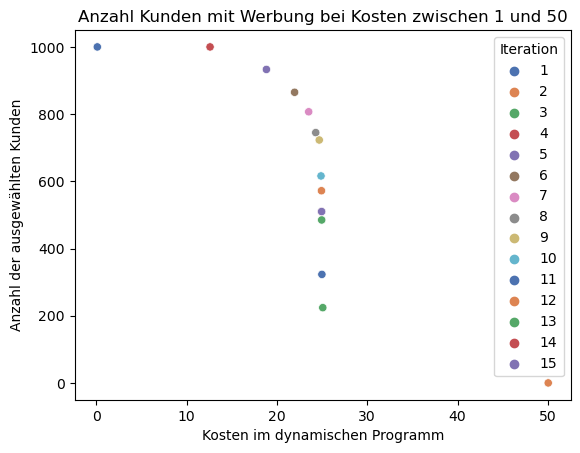

In [5]:
sns_plot = sns.scatterplot(data=df_perf, x="c", y="cust_count", hue="Iteration", palette="deep")
sns_plot.set_title("Anzahl Kunden mit Werbung bei Kosten zwischen 1 und 50")
sns_plot.set_xlabel("Kosten im dynamischen Programm")
sns_plot.set_ylabel("Anzahl der ausgewählten Kunden")
sns_plot.get_figure().savefig("dp_ausgewaehlte_kunden_bei_div_kosten_2.png", format="png", dpi=300)

In [22]:
start_time = time.time_ns()
last_time = start_time
fullfilepath = "dp_perf_log_c_1_50.csv"
iteration = 0
last_time = func.write_dp_performance_log(fullfilepath, start_time, last_time, 0, 0, 0, print_out = True, write_header = True)

for c in range(1, 50):
    iteration = iteration + 1
    customers = cust.copy()
    v(I, gamma, start_value, c, fix_order_costs, margin, cust_behaviour, value_table)
    customers = customers.merge(cust_behaviour, how='left', left_on=["t1_buy", "t2_buy", "t3_buy", "t1_prom", "t2_prom", "t3_prom"], right_on=["a1", "a2", "a3", "w1", "w2", "w3"], suffixes=('_x', ''))
    cust_count = customers["w"].sum()
    last_time = func.write_dp_performance_log(fullfilepath, start_time, last_time, c, cust_count, iteration, print_out = True, write_header = False)

Anzahl Kunden mit Werbung 0 bei Kosten von 0 in Iteration 0
Last Iteration: 1 2.3148027985186417
Anzahl Kunden mit Werbung 1000 bei Kosten von 1 in Iteration 1
Last Iteration: 1 2.2325449117310114
Anzahl Kunden mit Werbung 1000 bei Kosten von 2 in Iteration 2
Last Iteration: 1 2.15028127269926
Anzahl Kunden mit Werbung 1000 bei Kosten von 3 in Iteration 3
Last Iteration: 1 2.06801763366704
Anzahl Kunden mit Werbung 1000 bei Kosten von 4 in Iteration 4
Last Iteration: 1 1.9857539946351608
Anzahl Kunden mit Werbung 1000 bei Kosten von 5 in Iteration 5
Last Iteration: 1 1.9034903556031537
Anzahl Kunden mit Werbung 1000 bei Kosten von 6 in Iteration 6
Last Iteration: 1 1.8212225433069449
Anzahl Kunden mit Werbung 1000 bei Kosten von 7 in Iteration 7
Last Iteration: 1 1.7389150798950794
Anzahl Kunden mit Werbung 1000 bei Kosten von 8 in Iteration 8
Last Iteration: 1 1.6566076164831287
Anzahl Kunden mit Werbung 1000 bei Kosten von 9 in Iteration 9
Last Iteration: 1 1.5743001530714267
Anzahl 

In [6]:
fullfilepath = "dp_perf_log_c_1_50.csv"
df_perf = pd.read_csv(fullfilepath, sep=';', decimal=',')

df_perf["iteration_ms"] = df_perf["diff_ms"].astype(int)
df_perf["iteration_s"] = df_perf["iteration_ms"] / 1000
df_perf["cust_count"] = df_perf["cust_count"].astype(int)

df_perf.head()

,time_ms,diff_ms,c,cust_count,iteration,min_c,max_c,iteration_ms,iteration_s
0,190461,190460,1,1000,1,0,0,190460,190.460
1,383144,192682,2,1000,2,0,0,192682,192.682
2,576023,192879,3,1000,3,0,0,192879,192.879
3,773926,197903,4,1000,4,0,0,197903,197.903
4,983718,209792,5,1000,5,0,0,209792,209.792


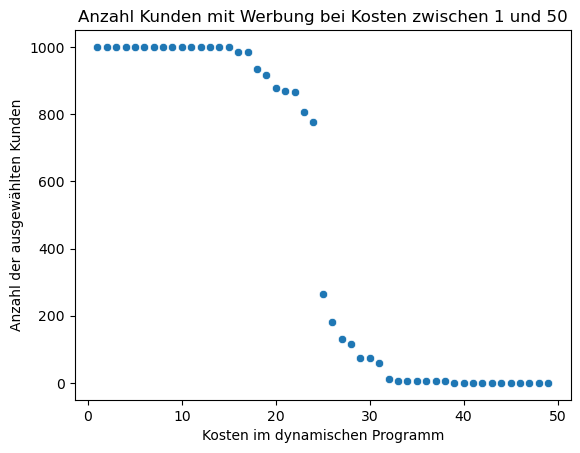

In [7]:
sns_plot = sns.scatterplot(data=df_perf, x="c", y="cust_count")
sns_plot.set_title("Anzahl Kunden mit Werbung bei Kosten zwischen 1 und 50")
sns_plot.set_xlabel("Kosten im dynamischen Programm")
sns_plot.set_ylabel("Anzahl der ausgewählten Kunden")
sns_plot.get_figure().savefig("dp_ausgewaehlte_kunden_bei_div_kosten.png", format="png", dpi=300)